Classifier supporting the diagnosis of cancer

Wprowadzenie

Celem projektu jest wykonanie klasyfikatora wspomagajƒÖcego diagnozƒô
rodzaju nowotworu piersi korzystajƒÖc ze zbioru danych Breast Cancer
Wisconsin (Diagnostic). Jest to zestaw wbudowany w bibliotekƒô Scikit-learn.

In [3]:
# Loading dataset

from sklearn import datasets

patients = datasets.load_breast_cancer()
print(patients.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

W zestawie tym ka≈ºdy z pacjent√≥w jest opisany przez 10 atrybut√≥w rzeczywistoliczbowych. SƒÖ to:
‚óè radius (promie≈Ñ)
‚óè texture (tekstura)
‚óè perimeter (obw√≥d)
‚óè area (obszar)
‚óè smoothness (g≈Çadko≈õƒá)
‚óè compactness (zwarto≈õƒá)
‚óè concavity (wklƒôs≈Ço≈õƒá)
‚óè concave points (punkty wklƒôs≈Çe)
‚óè symmetry (symetria)
‚óè fractal dimension (wymiar fraktalny)
≈örednia, b≈ÇƒÖd standardowy i ‚Äúwarto≈õƒá najgorsza‚Äù (≈õrednia z trzech najwiƒôkszych/najmniejszych warto≈õci) tych cech zosta≈Çy obliczone dla ka≈ºdego obrazu, co da≈Ço ≈ÇƒÖcznie 30 cech.

In [4]:
# Shape of features and targets

print(patients.data.shape)
print(patients.target.shape)

(569, 30)
(569,)


Przyk≈Çadem mogƒÖ byƒá 3 pola opisujƒÖce promie≈Ñ: pole 0 to ≈õredni promie≈Ñ, pole 10 to promie≈Ñ SE, pole 20 to najgorszy promie≈Ñ.

In [5]:
# Printing first 5 instances

import pandas as pd

data_pd = pd.DataFrame(patients.data, columns = [patients.feature_names])
data_pd.head()

mean radius mean texture mean perimeter mean area mean smoothness  \
0       17.99        10.38         122.80    1001.0         0.11840   
1       20.57        17.77         132.90    1326.0         0.08474   
2       19.69        21.25         130.00    1203.0         0.10960   
3       11.42        20.38          77.58     386.1         0.14250   
4       20.29        14.34         135.10    1297.0         0.10030   

  mean compactness mean concavity mean concave points mean symmetry  \
0          0.27760         0.3001             0.14710        0.2419   
1          0.07864         0.0869             0.07017        0.1812   
2          0.15990         0.1974             0.12790        0.2069   
3          0.28390         0.2414             0.10520        0.2597   
4          0.13280         0.1980             0.10430        0.1809   

  mean fractal dimension  ... worst radius worst texture worst perimeter  \
0                0.07871  ...        25.38         17.33          184.60   
1                0.05667  ...        24.99         23.41          158.80   
2                0.05999  ...        23.57         25.53          152.50   
3                0.09744  ...        14.91         26.50           98.87   
4                0.05883  ...        22.54         16.67          152.20   

  worst area worst smoothness worst compactness worst concavity  \
0     2019.0           0.1622            0.6656          0.7119   
1     1956.0           0.1238            0.1866          0.2416   
2     1709.0           0.1444            0.4245          0.4504   
3      567.7           0.2098            0.8663          0.6869   
4     1575.0           0.1374            0.2050          0.4000   

  worst concave points worst symmetry worst fractal dimension  
0               0.2654         0.4601                 0.11890  
1               0.1860         0.2750                 0.08902  
2               0.2430         0.3613                 0.08758  
3               0.2575         0.6638                 0.17300  
4               0.1625         0.2364                 0.07678  

[5 rows x 30 columns]

Dane sprawdzamy r√≥wnie≈º pod wzglƒôdem pustych kolumn. Wszystkie kolumny sƒÖ pe≈Çne, wiƒôc nie trzeba usuwaƒá ≈ºadnej z nich.

In [6]:
# Data info

data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

Ka≈ºdej instancji zosta≈Ça przypisana jedna etykieta opisujƒÖca diagnozƒô nowotworu - ≈Çagodny lub z≈Ço≈õliwy. Spo≈õr√≥d 569 obserwacji 357 przypadk√≥w (czyli 62,74%) uznano za ≈Çagodne, podczas gdy pozosta≈Çe 212 (czyli 37,26%) za z≈Ço≈õliwe. Podczas testowania opracowanego modelu predykcyjnego, nale≈ºy spodziewaƒá siƒô podobnego odsetka etykiet.

Liczba komorek oznaczonych jako Benign: 357
Liczba komorek oznaczonych jako Malignant: 212

% komorek oznaczonych jako Benign: 62.74%
% komorek oznaczonych jako Malignant: 37.26%


/Users/jakubkosciolek/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


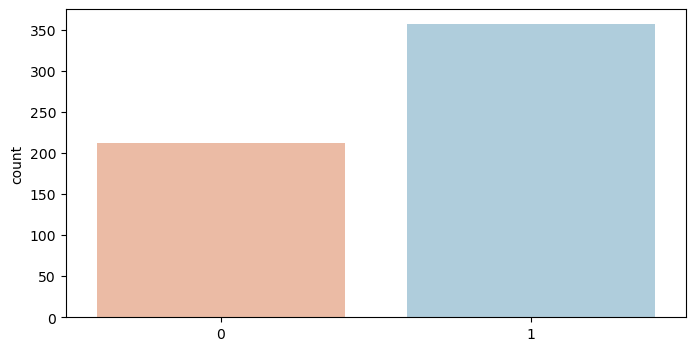

In [7]:
# Plotting number of targets based on prediction (benign or malignant)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



plt.figure(figsize=(8, 4))
sns.countplot(patients.target, palette='RdBu')

benign = np.count_nonzero(patients.target == 1)
malignant = np.count_nonzero(patients.target == 0)

print(f"Liczba komorek oznaczonych jako Benign: {benign}")
print(f"Liczba komorek oznaczonych jako Malignant: {malignant}\n")
print(f"% komorek oznaczonych jako Benign: {round(benign / len(patients.target) * 100, 2)}%")
print(f"% komorek oznaczonych jako Malignant: {round(malignant / len(patients.target) * 100, 2)}%")

In [8]:
# Plotting features relations (not working!)

#import seaborn as sb
#
#sb.set_theme(style="ticks")
#sb.pairplot(data_pd, hue="species")

Chocia≈º zbi√≥r danych ma 30 kolumn, sƒÖ one w rzeczywisto≈õci bardzo blisko powiƒÖzane, poniewa≈º wszystkie zawierajƒÖ informacje na temat tych samych 10 kluczowych atrybut√≥w.

/var/folders/br/g_qkzzcn0sg04fh1nzf_c1180000gn/T/ipykernel_19495/196885324.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


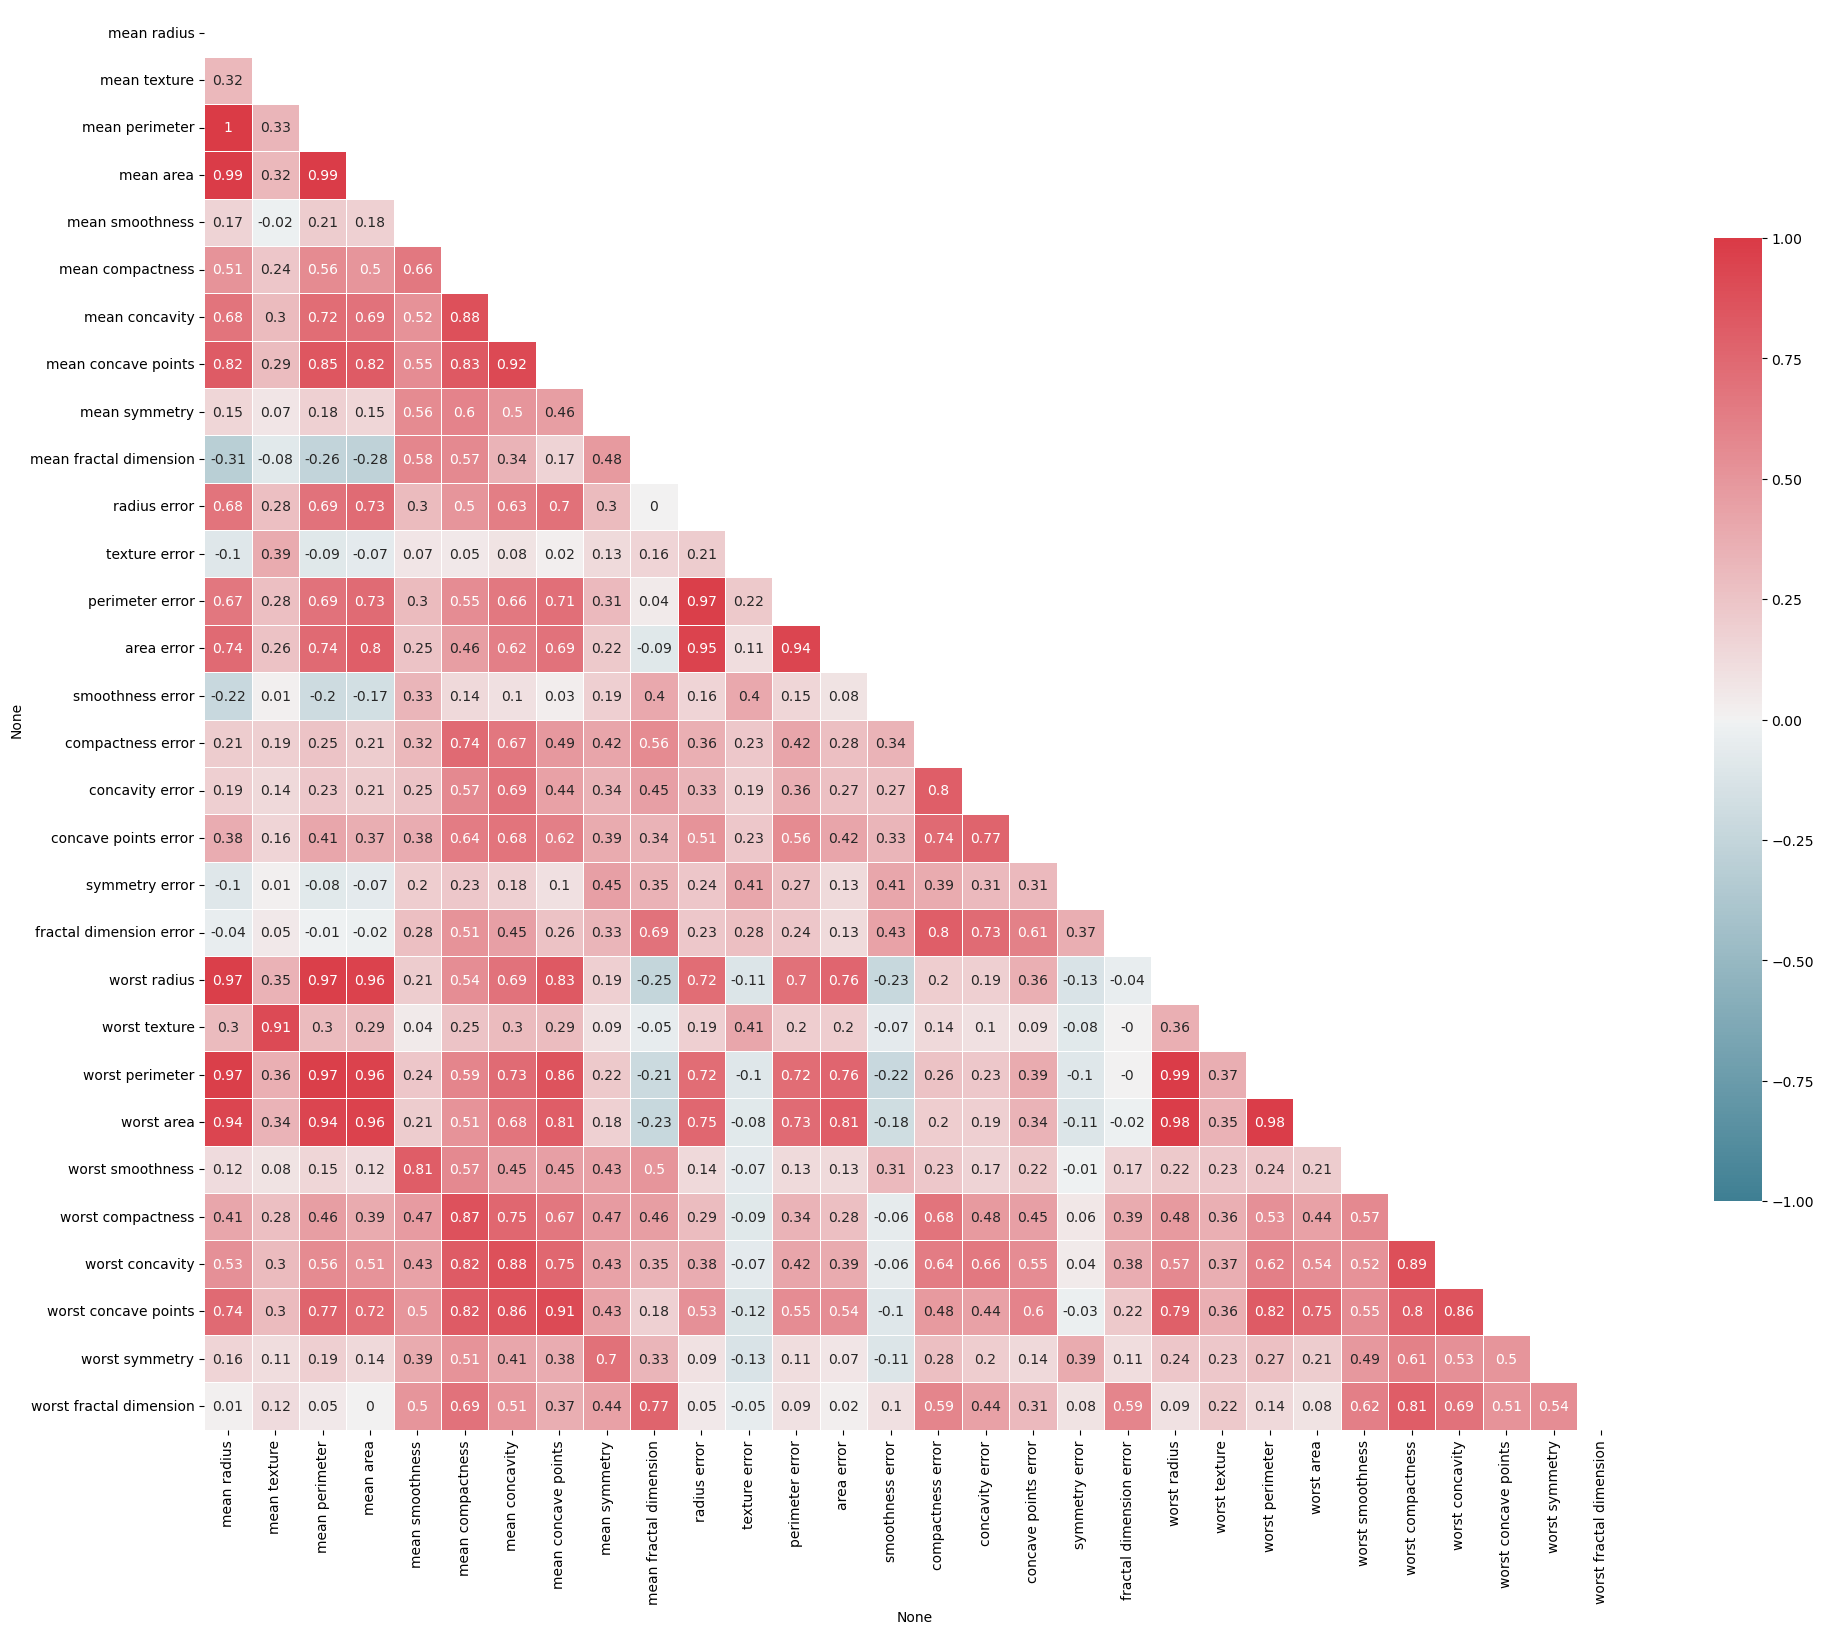

In [9]:
# Generate and visualize the correlation matrix
corr = data_pd.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

PatrzƒÖc na macierz mo≈ºemy natychmiast stwierdziƒá korelacjƒô wielu danych. Przyk≈Çadowo kolumna radius_mean ma wynik korelacji odpowiednio 1 i 0,99 z kolumnami perimeter_mean i area_mean. Dzieje siƒô tak prawdopodobnie dlatego, ≈ºe te trzy kolumny zasadniczo zawierajƒÖ te same informacje, czyli fizyczny rozmiar obserwacji (kom√≥rki). Dlatego, przechodzƒÖc do dalszej analizy, powinni≈õmy wybraƒá tylko jednƒÖ z trzech kolumn.
5
  
Zale≈ºno≈õƒá, jest widoczna r√≥wnie≈º miƒôdzy kolumnami ‚Äû≈õrednimi‚Äù a kolumnami ‚Äûnajgorszymi‚Äù. Na przyk≈Çad kolumna radius_mean ma wynik korelacji 0,97 z kolumnƒÖ radius_worst. W rzeczywisto≈õci ka≈ºdy z 10 kluczowych atrybut√≥w wykazuje bardzo wysokie (od 0,7 do 0,97) korelacje miƒôdzy kolumnami ‚Äû≈õrednimi‚Äù i ‚Äûnajgorszymi‚Äù. Jest to nieuniknione, poniewa≈º ‚Äûnajgorsze‚Äù kolumny sƒÖ zasadniczo podzbiorem kolumn ‚Äû≈õrednich‚Äù. Z tego powodu powinni≈õmy odrzuciƒá ‚Äûnajgorsze‚Äù kolumny i skupiƒá siƒô tylko na kolumnach ‚Äû≈õrednich‚Äù.
Niestety oba rodzaje korelacji w naszym wypadku by≈Çy niemo≈ºliwe do wyeliminowania z powodu licznych b≈Çƒôd√≥w przy usuwaniu cech z analizy.

Wykorzystane narzƒôdzia

Celem utworzenia mo≈ºliwie najlepszego modelu wykorzystamy liczne narzƒôdzia dostarczane przez bibliotekƒô Scikit-learn. SƒÖ to m.in:
1) Narzƒôdzia s≈Çu≈ºƒÖce do oceny jako≈õci modelu takie jak:
‚óã prediction probability (prawdopodobie≈Ñstwo przewidywania)
‚óã accuracy score (wynik dok≈Çadno≈õci)
‚óã confusion matrix (macierz pomy≈Çek)
‚óã cross-validation (walidacja krzy≈ºowa)
2) Polynomial features (cechy wielomianowe)

Wprowadzenie teoretyczne

1. Uczenie maszynowe

Uczenie maszynowe (ang. machine learning) - dzia≈Ç sztucznej inteligencji zajmujƒÖcy siƒô teoriƒÖ i praktycznym zastosowaniem algorytm√≥w analizujƒÖcych dane. Algorytmy te poprawiajƒÖ siƒô automatycznie poprzez do≈õwiadczenie, czyli ekspozycje na dane. Budowane sƒÖ modele, dziƒôki kt√≥rym komputer nie potrzebuje wiƒôcej ingerencji cz≈Çowieka w analizie danych - niepotrzebne sƒÖ bezpo≈õrednie instrukcje. Uczenie maszynowe posiada trzy swoje podstawowe odmiany: uczenie nadzorowane, uczenie nienadzorowane oraz uczenie przez wzmacnianie.
Uczenie nadzorowane (ang. supervised machine learning) analizuje dane i buduje modele za pomocƒÖ wej≈õciowych danych uczƒÖcych oznaczonych etykietami (and. labels). Model uczenia nadzorowanego mo≈ºna przedstawiƒá na nastƒôpujƒÖcym grafie:

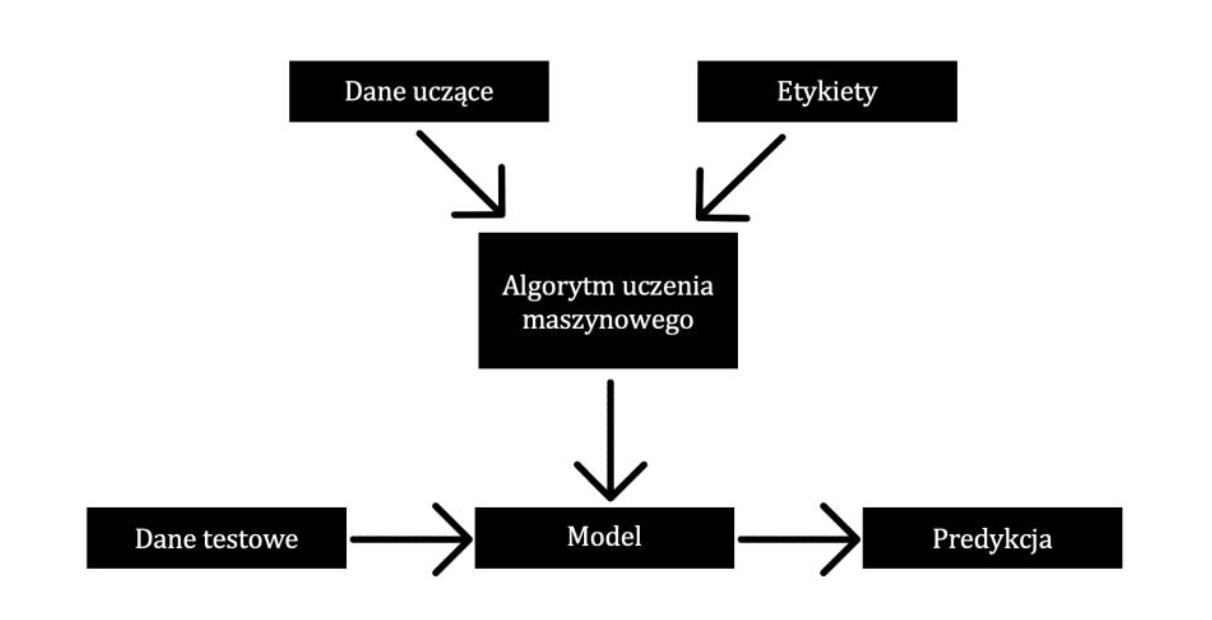

Uczenie nadzorowane dzieli siƒô na klasyfikacjƒô oraz regresjƒô. Algorytmami regresji sƒÖ miƒôdzy innymi Regresja Liniowa, Maszyna Wektor√≥w No≈õnych oraz Regresja Poissona, a klasyfikacji: Sieci Neuronowe, Drzewa Decyzyjne, Naiwny Klasyfikator Bayesowski oraz Regresja Logistyczna, kt√≥rej bƒôdƒô u≈ºywa≈Ç


2. Regresjalogistyczna

Regresja logistyczna jest uog√≥lnionym przypadkiem modelu liniowego - zmienna przewidywana jest zmiennƒÖ dychotomicznƒÖ, a wiƒôc przyjmuje tylko dwie warto≈õci (np. 0/1, choroba/zdrowie, sukces/pora≈ºka). Model jest opisywany przez funkcjƒô sigmoidalnƒÖ w postaci:

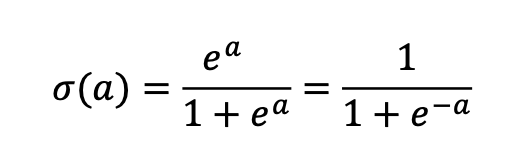

Warto≈õƒá a stanowi tutaj ca≈Çkowite pobudzenie, czyli liniowƒÖ kombinacjƒô wag i cech funkcji, kt√≥ra mo≈ºna policzyƒá za pomocƒÖ wzoru

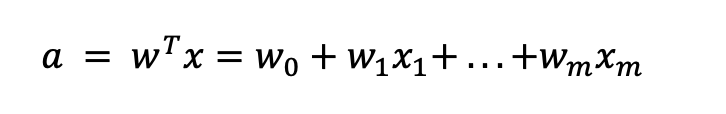

gdzie:
x - dane wej≈õciowe,
w - wektor wag powiƒÖzany z danymi

Funkcja logistyczna przyjmuje warto≈õci od 0 (gdy x dƒÖ≈ºy do -‚àû) do 1 (gdy x zmierza do ‚àû).

In [ ]:
# Plotting logistic function graph

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color="k")
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color="k")
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()


3. Macierz pomy≈Çek

Macierz pomy≈Çek (ang. Confusion Matrix) podzielona jest na cztery kom√≥rki: kolumny oznaczajƒÖ wynik predyktowany jako pozytywny lub jako negatywny, a wiersze rzeczywisty wynik pozytywny bƒÖd≈∫ negatywny. Zostaje zwracana jako element analizy jako≈õci klasyfikacji binarnej, gdzie mo≈ºliwe sƒÖ dwie opcje zaklasyfikowania. Przyk≈Çadowo, je≈õli wprowadzimy danƒÖ, kt√≥ra posiada etykietƒô pozytywnƒÖ, a model zaklasyfikuje jƒÖ jako danƒÖ z etykietƒÖ negatywnƒÖ, predykcja bƒôdzie w Macierzy Pomy≈Çek w kom√≥rce z klasƒÖ predyktowanƒÖ fa≈Çszywie negatywnƒÖ.


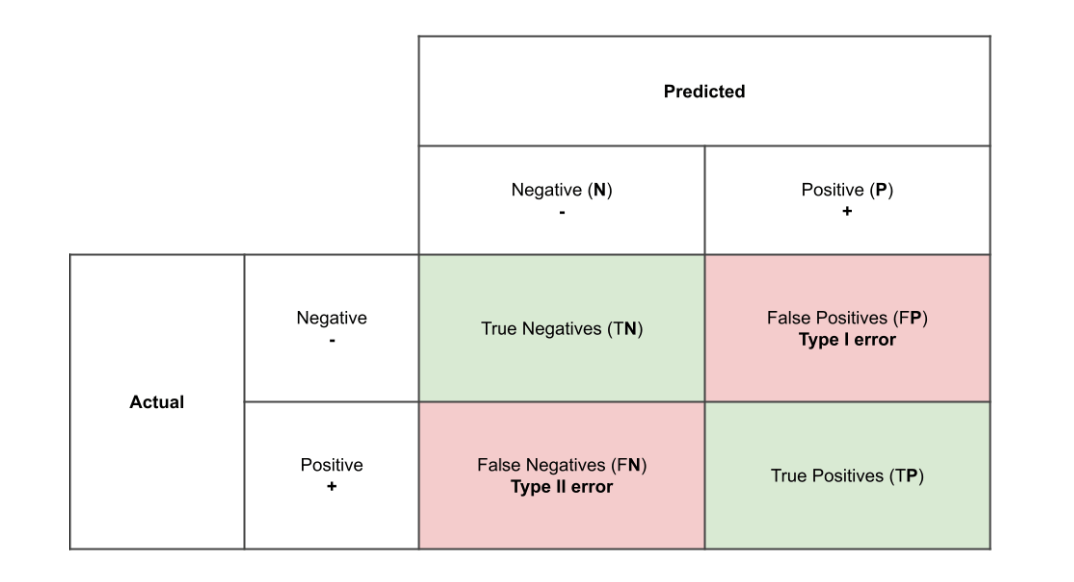

4. Walidacja krzy≈ºowa

Walidacja krzy≈ºowa (ang. Cross-validation) - technika podzia≈Çu zbioru danych na zbi√≥r trenujƒÖcy i testujƒÖcy. S≈Çu≈ºy do oceny jako≈õci modelu. Najpopularniejszy spos√≥b walidacji krzy≈ºowej to schemat walidacji k-krotnej (ang. K-Fold Cross Validation). Dzieli ona zbi√≥r danych na k czƒô≈õci, z kt√≥rych jedna to zbi√≥r testujƒÖcy, a (k-1) to zbi√≥r trenujƒÖcy. Nastƒôpnie algorytm przeprowadza k iteracji, podczas kt√≥rych zbiorem testujƒÖcym zostaje kolejna, jedna z k czƒô≈õci zbioru danych. Mo≈ºe to byƒá przydatne do poprawy jako≈õci modelu, kiedy dysponujemy niewielkim zestawem danych. Algorytm ten mo≈ºna przedstawiƒá nastƒôpujƒÖcym schematem:

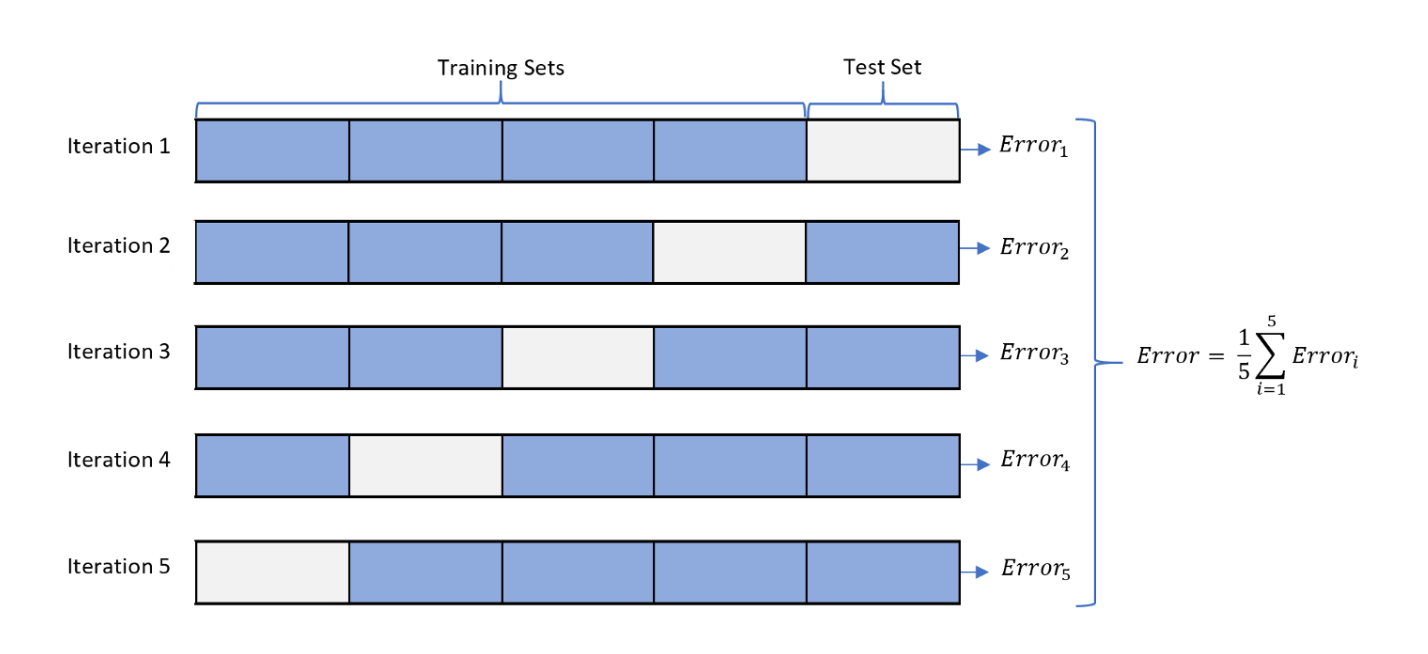

5. Cechy wielomianowe

Cechy wielomianowe (ang. Polynomial Features) - technika dodawania cech pochodzƒÖcych z wielomian√≥w o wy≈ºszym stopniu dla ka≈ºdej z istniejƒÖcych cech do zbioru danych. Jest to g≈Ç√≥wnie wykorzystywane przy trenowaniu modeli regresji liniowej, poniewa≈º pozwala na modelowanie nieliniowych zale≈ºno≈õci prostymi algorytmami.
Przyk≈Çadowo, je≈ºeli dane wej≈õciowe sƒÖ dwuwymiarowe i w postaci [ùëé, ùëè], polynomial features 2-go stopnia wyglƒÖdajƒÖ nastƒôpujƒÖco: [1, ùëé, ùëè, ùëé2, ùëéùëè, ùëè2].


6. Rekurencyjna eliminacja cech

Rekurencyjna eliminacja cech (ang. Recursive Feature Elimination lub RFE) - iteracyjny algorytm selekcyjny, kt√≥ry w kolejnych krokach eliminuje poszczeg√≥lne cechy, je≈õli dok≈Çadno≈õƒá modelu na tym zyskuje. S≈Çu≈ºy to zachowaniu odpowiedniego stopnia korelacji miƒôdzy danymi treningowymi i modelem. AlternatywnƒÖ metodƒÖ jest tak zwana metoda wsp√≥≈Çczynnika regularyzacyjnego.

Badania symulacyjne

Pierwszym krokiem by≈Ço ustalenie czy dane wymagajƒÖ standaryzacji. W tym celu wy≈õwietlili≈õmy dane opisujƒÖce pierwszego pacjenta oraz ≈õrednie warto≈õci i b≈Çƒôdy standardowe wszystkich atrybut√≥w dla wszystkich instancji.

In [10]:
# 1-st patient features

print(patients['data'][1,:])

[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]


In [11]:
# Mean and Standard Deviation of the dataset

print("---Mean---")
print(patients['data'].mean(axis=0))
print("---std---")
print(patients['data'].std(axis=0))

---Mean---
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
---std---
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


Dane wymaga≈Çy standaryzacji. Do tego zadania pos≈Çu≈ºy≈Çem siƒô StandardScaler‚Äôem.

In [12]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(patients.data)

In [13]:
# Mean and Standard Deviation of the dataset after scaling

print(scaled_data[1,:])
print('---Mean---')
print(scaled_data.mean(axis=0))
print('--std---')
print(scaled_data.std(axis=0))

[ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
 -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
  1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
  2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
 -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
  1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
 -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
 -2.43889668e-01  2.81189987e-01]
---Mean---
[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
--std---
[1

Budowa modelu

Budowƒô modelu rozpocz od podzielenia wczytanych danych na roz≈ÇƒÖczne zbiory: treningowy oraz testowy. Stosunek ich ilo≈õci wynosi 9:1.

In [14]:
# Splitting

from sklearn.model_selection import train_test_split

patients_train_data, patients_test_data, \
patients_train_target, patients_test_target = \
train_test_split(scaled_data, patients.target, test_size=0.1)

In [15]:
# Training and testing sets sizes

print("Training dataset:")
print(f"patients_train_data: {patients_train_data.shape}")
print(f"patients_train_target: {patients_train_target.shape}\n")

print("Testing dataset:")
print(f"patients_test_data: {patients_test_data.shape}")
print(f"patients_test_target: {patients_test_target.shape}")

Training dataset:
patients_train_data: (512, 30)
patients_train_target: (512,)

Testing dataset:
patients_test_data: (57, 30)
patients_test_target: (57,)


W kolejnym kroku skorzystali≈õmy z regresji logistycznej. W bibliotece SciKit- Learn jest to trywialnie proste, poniewa≈º istnieje specjalna klasa implementujƒÖca to zadanie. Po utworzeniu instancji tej klasy korzystamy z metody fit() przekazujƒÖc jej dane treningowe (dane oraz odpowiadajƒÖce im etykiety). Wyznacza ona granicƒô decyzyjnƒÖ dla przekazanych danych (funkcjƒô hùúÉ (ùë•).

In [16]:
# Training the model with Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(patients_train_data, patients_train_target)

LogisticRegression()

Mamy zatem dzia≈ÇajƒÖcy model, kt√≥ry mo≈ºemy wykorzystaƒá do predykcji danych. W kolejnym kroku przetestowa≈Çem jego dzia≈Çanie.

Testowanie modelu

Model przetestowa≈Çem wy≈õwietlajƒÖc warto≈õci przewidywane dla trzech losowo wybranych instancji spo≈õr√≥d danych testowych i zestawiajƒÖc je z odpowiadajƒÖcymi im etykietami. We wszystkich przypadkach model dokona≈Ç prawid≈Çowej predykcji.

In [17]:
# Printing predicted and real value for 3 patients with a random id

import random


id = random.randint(0,56)

prediction = logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}\n")


id = random.randint(0,56)

prediction = logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}\n")


id = random.randint(0,56)

prediction = logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}")

Model predicted for patient 38 value [1]
Real value for patient "38" is 1

Model predicted for patient 4 value [0]
Real value for patient "4" is 0

Model predicted for patient 44 value [1]
Real value for patient "44" is 1


Dla ostatniej sprawdzanej instancji wy≈õwietlam dodatkowo prawdopodobie≈Ñstwo przewidywania (prediction probability), aby sprawdziƒá jak bardzo model by≈Ç pewny przypisanej etykiety. Model przypisa≈Ç jej prawdopodobie≈Ñstwo wynoszƒÖce oko≈Ço 0,95.

In [18]:
# Printing the probability of the prediction for the testing set

prediction_probability = logistic_regression.predict_proba(patients_test_data[id,:].reshape(1,-1))
print(f"Prediction probability: {prediction_probability}")

Prediction probability: [[1.65715380e-04 9.99834285e-01]]


Ocena modelu

Przechodzƒô teraz do oceny modelu. S≈Çu≈ºy do tego wynik dok≈Çadno≈õci (accuracy score) oraz macierz pomy≈Çek (confusion matrix). Celem wykonania oceny dok≈Çadno≈õci korzystam z funkcji accuracy_score(), kt√≥ra sprawdza poprawno≈õƒá predykcji dla wszystkich danych testowych. Model okaza≈Ç siƒô byƒá zgodny w niemal 95%.

In [19]:
# Printing the accuracy score of testing set

from sklearn.metrics import accuracy_score

acc = accuracy_score(patients_test_target, logistic_regression.predict(patients_test_data))
print(f"Model accuracy is {acc}")

Model accuracy is 0.9298245614035088


Macierz pomy≈Çek dla 57 instancji testowych wskaza≈Ça 3 b≈Çƒôdne przewidywania modelu. Wszystkie b≈Çƒôdy polega≈Çy na niew≈Ça≈õciwym przypisaniu etykiety ‚Äú1‚Äù. Wynik ten zgadza siƒô z ocenƒÖ dok≈Çadno≈õci (54/57 ‚âà 0.94 ).

In [20]:
# Printing confusion matrix of the testing set

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(patients_test_target, logistic_regression.predict(patients_test_data))


true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_positive = conf_matrix[1][1]

print('Confusion Matrix: \n', conf_matrix, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / (true_negative + true_positive + false_negative + false_positive)
            * 100, 1), '%')

Confusion Matrix: 
 [[16  4]
 [ 0 37]] 

True Negative: 16
False Positive: 4
False Negative: 0
True Positive: 37
Correct Predictions 93.0 %


Sprawdzili≈õmy tak≈ºe model przy pomocy walidacji krzy≈ºowej dla r√≥≈ºnych ilo≈õci podzia≈Ç√≥w danych.

In [21]:
# Printing Mean Value Score of the testing set

from sklearn.model_selection import cross_val_score

for i in range(2,7):
    scores = cross_val_score(LogisticRegression(), patients_test_data, patients_test_target, cv=i)
    print(f"Mean value score for i = {i} is {scores.mean():.2f}")

Mean value score for i = 2 is 0.95
Mean value score for i = 3 is 0.93
Mean value score for i = 4 is 0.96
Mean value score for i = 5 is 0.93
Mean value score for i = 6 is 0.93


Wyniki analizy poprzez r√≥≈ºne parametry algorytmu sƒÖ bardzo zbli≈ºone do siebie, prawdopodobnie przez wielko≈õƒá zbioru. Najlepszy wynik osiƒÖgnƒÖ≈Ç podzia≈Ç na 2 zbiory. Przy powtarzaniu algorytmu w zdecydowanej wiƒôkszo≈õci przypadk√≥w najlepszym wynikiem by≈Ç w≈Ça≈õnie ten podzia≈Ç.

Model przetestowali≈õmy r√≥wnie≈º pod kƒÖtem przeuczenia. W tym celu wykorzystali≈õmy cechy wielomianowe (polynomial features) zmieniajƒÖc dane z liniowych na wielomianowe i sprawdzajƒÖc b≈ÇƒÖd ≈õredniokwadratowy oraz wynik wariancji dla r√≥≈ºnych stopni wielomianu

In [41]:
# Printing Squared Error and Variance Score for 6 different values of Polyomial Features

%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6]
y_mean = []
y_score = []

for i in range (1, 7):
    pt = PolynomialFeatures(i, )
    patients_train_poly = pt.fit_transform(patients_train_data)
    patients_test_poly = pt.fit_transform(patients_test_data)
    
    lr_poly = LogisticRegression()
    lr_poly.fit(patients_train_poly, patients_train_target)
    
    print(f"-=={i} degree==-") 
    print(f"squared error: %.2f" % mean_squared_error(patients_test_target, lr_poly.predict(patients_test_poly)))
    print("variance score: %.2f" % lr_poly.score(patients_test_poly, patients_test_target))
    y_mean.append(mean_squared_error(patients_test_target, lr_poly.predict(patients_test_poly)))
    y_score.append(lr_poly.score(patients_test_poly, patients_test_target))

-==1 degree==-
squared error: 0.07
variance score: 0.93
-==2 degree==-
squared error: 0.04
variance score: 0.96
-==3 degree==-
squared error: 0.09
variance score: 0.91


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-==4 degree==-
squared error: 0.05
variance score: 0.95


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-==5 degree==-
squared error: 0.09
variance score: 0.91


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-==6 degree==-
squared error: 0.07
variance score: 0.93


Zmiana rzƒôdu wielomianu w zakresie od 1 do 6 wp≈Çywa na model nieznacznie. Mo≈ºe to byƒá spowodowane widocznym na wykresie danych obszarem o du≈ºym zagƒôszczeniu obiekt√≥w obu klas. Przeprowadzenie wyra≈∫nej linii decyzyjnej zwiƒôkszajƒÖcej dok≈Çadno≈õƒá modelu wymaga≈Çoby u≈ºycia wielomianu wy≈ºszego rzƒôdu. Nie zdecydowali≈õmy siƒô na to jednak z powodu relatywnie wysokiego kosztu takiego rozwiƒÖzania wzglƒôdem niewielkiej poprawy modelu oraz zagro≈ºenia przeuczenia modelu.

Wnioski

Model zosta≈Ç wykonany prawid≈Çowo, co potwierdzajƒÖ narzƒôdzia s≈Çu≈ºƒÖce do oceny modelu. PrzyporzƒÖdkowuje on w≈Ça≈õciwe etykiety dla ponad 90% danych testowych.

Najbardziej obiecujƒÖcƒÖ metodƒÖ na poprawƒô jako≈õci modelu by≈Ço usuniƒôcie zbƒôdnych cech, kt√≥re przez silnƒÖ korelacjƒô miƒôdzy sobƒÖ jedynie utrudnia≈Çy odnalezienie w≈Ça≈õciwej granicy decyzyjnej. Pos≈Çu≈ºyƒá do tego mog≈Ço wyeliminowanie niekt√≥rych danych ju≈º na etapie analizy lub zastosowanie rekursywnej eliminacji cech. Niestety obie metody powodowa≈Çy liczne b≈Çƒôdy i z tej przyczyny nie zosta≈Çy wykorzystane.

W trakcie naszej pracy wyra≈∫nie widoczna by≈Ça pewna komplikacja w tworzeniu modelu w oparciu o wykorzystany zestaw danych - niewielka liczba instancji. Skutkowa≈Ço to niejednokrotnie r√≥≈ºnymi wynikami tych samych operacji w kolejnych pr√≥bach stworzenia modelu. R√≥≈ºnice te jednak nie by≈Çy znaczne i skuteczno≈õƒá modelu zawsze oscylowa≈Ça wok√≥≈Ç 95%.

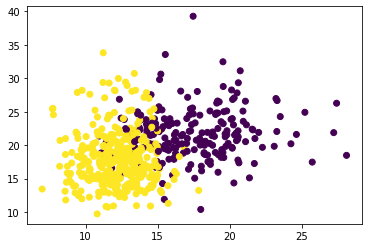

In [42]:
# Plotting targets

plt.scatter(patients.data[:,0],patients.data[:,1], c=patients.target)

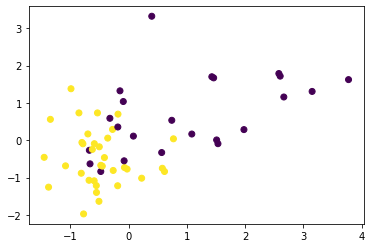

In [43]:
# Plotting targets of the testing set

plt.scatter(patients_test_data[:,0],patients_test_data[:,1], c=patients_test_target)

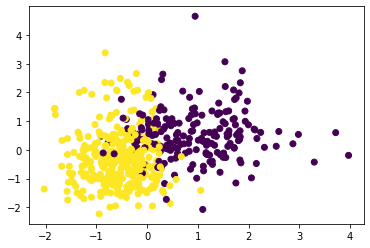

In [44]:
# Plotting targets of the training set

plt.scatter(patients_train_data[:,0],patients_train_data[:,1], c=patients_train_target)

In [ ]:
#Recursive feature elimination (not working!)

# from sklearn.feature_selection import RFE

# pt = PolynomialFeatures(3, )#interaction_only=True)
# patients_train_poly = pt.fit_transform(patients_train_data)
# patients_train_poly.shape
# patients_test_poly = pt.fit_transform(patients_test_data)



# sel_ = RFE(estimator=LogisticRegression(), n_features_to_select=45)
# sel_.fit(patients_train_poly, patients_train_target)

# print(sel_.support_)
# print(sel_.ranking_)

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFE
# from sklearn.preprocessing import PolynomialFeatures

# x_mean=[]
# y_mean=[]
# x_score=[]
# y_score=[]

# pt = PolynomialFeatures(3, )#interaction_only=True)
# patients_train_poly = pt.fit_transform(patients_train_data)
# patients_train_poly.shape
# patients_test_poly = pt.fit_transform(patients_test_data)

# for i in range (5,65,5):
#     x_mean.append(i)
#     x_score.append(i)
#     sel_ = RFE(estimator=LogisticRegression(), n_features_to_select=45)
#     sel_.fit(patients_train_poly, patients_train_target)
    
#     print(f"-=={i} features==-") 
#     print("squared erro: %.2f" % 
#         mean_squared_error(patients_test_target, sel_.predict(patients_test_poly)))
#     score = sel_.score(patients_test_poly, patients_test_target)
#     print("variance score: %.2f" % score)
    
#     y_mean.append(mean_squared_error(patients_test_target, sel_.predict(patients_test_poly)))
#     y_score.append(score)
    
# plt.figure(figsize=(10, 5))
# plt.yscale('symlog')
# plt.plot(x_mean, y_mean)
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.yscale('symlog')
# plt.plot(x_score, y_score)
# plt.show()